In [74]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import requests
import os
import alpaca_trade_api as tradeapi
import requests

%matplotlib inline

In [75]:
load_dotenv()

True

In [76]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [77]:
#verify
type(alpaca_api_key)
type(alpaca_secret_key)

str

### TO save moving your .env file everywhere

In [78]:
from pathlib import Path
load_dotenv(Path('C:/.env'))

False

## This stuff below saves you from using "import request" and all of the stuff associated

Link to all of the requests: https://pypi.org/project/alpaca-trade-api/

In [79]:
#Create the Alpaca API object
alpaca = tradeapi.REST?

Init signature:
tradeapi.REST(
    key_id: str = None,
    secret_key: str = None,
    base_url: alpaca_trade_api.common.URL = None,
    api_version: str = None,
    oauth=None,
    raw_data: bool = False,
)
Docstring:      <no docstring>
Init docstring:
:param raw_data: should we return api response raw or wrap it with
                 Entity objects.
File:           /opt/anaconda3/envs/dev/lib/python3.7/site-packages/alpaca_trade_api/rest.py
Type:           type
Subclasses:     


## Initialize the API

In [80]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [81]:
#REST object test
alpaca

In [82]:
alpaca.get_bars?

Signature:
alpaca.get_bars(
    symbol: Union[str, List[str]],
    timeframe: alpaca_trade_api.rest.TimeFrame,
    start: Union[str, NoneType] = None,
    end: Union[str, NoneType] = None,
    adjustment: str = 'raw',
    limit: int = None,
    feed: Union[str, NoneType] = None,
    asof: Union[str, NoneType] = None,
) -> alpaca_trade_api.entity_v2.BarsV2
Docstring: <no docstring>
File:      /opt/anaconda3/envs/dev/lib/python3.7/site-packages/alpaca_trade_api/rest.py
Type:      method


In [83]:
#Format Current date as ISO format

today = pd.Timestamp('2021-05-14', tz = 'America/New_York').isoformat()
nottoday = pd.Timestamp('2022-07-14', tz = 'America/New_York').isoformat()

In [84]:
tickers = ['FB', 'TWTR']

In [85]:
#set timeframe to one day ("1Day") for the alpaca api

timeframe = '1Day'

## Import the data

In [86]:
#get current closing prices for tickers
df_pork = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = nottoday
).df #WHY DO WE PUT .df?

#display sample data
df_pork.head(5)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-05-14 04:00:00+00:00,309.540,316.85,309.08,315.94,19187703,232183,313.971450,FB
2021-05-17 04:00:00+00:00,313.550,315.68,311.58,315.46,15400943,176917,314.103262,FB
2021-05-18 04:00:00+00:00,315.590,316.50,309.81,309.96,14522332,197125,313.432871,FB
2021-05-19 04:00:00+00:00,304.185,314.66,303.57,313.59,19105844,243869,310.615098,FB
2021-05-20 04:00:00+00:00,313.580,319.25,313.16,318.61,17319741,214875,317.385351,FB


In [87]:
from alpaca_trade_api.rest import TimeFrame, TimeFrameUnit

### Getting hourly/minutes data

In [89]:
#get current closing prices for tickers
df_port = alpaca.get_bars(
    tickers,
    TimeFrame(5, TimeFrameUnit.Hour), # Every 5 hours
    start = today,
    end = nottoday
).df #WHY DO WE PUT .df?

#display sample data
df_port

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-05-14 08:00:00+00:00,307.800,309.500,307.5000,308.710,50561,970,308.550892,FB
2021-05-14 13:00:00+00:00,308.700,314.775,308.0900,314.760,11596333,150582,312.683275,FB
2021-05-14 18:00:00+00:00,314.760,316.850,314.6500,316.620,7361740,79132,316.000396,FB
2021-05-14 23:00:00+00:00,316.400,317.000,316.4000,317.000,5899,64,316.680910,FB
2021-05-17 06:00:00+00:00,314.500,315.000,314.5000,314.550,2882,73,314.684643,FB
...,...,...,...,...,...,...,...,...
2022-07-12 22:00:00+00:00,34.360,34.580,34.0600,34.440,1173112,1212,34.161991,TWTR
2022-07-13 08:00:00+00:00,34.460,35.050,34.2100,34.410,872309,7402,34.645784,TWTR
2022-07-13 13:00:00+00:00,34.410,37.160,34.0600,36.815,38974547,228366,36.253238,TWTR


<br>

df_port[df_port['symbol']=='FB']

- This only selects the columns where the symbol == FB

In [90]:
# Re-organise the data

FB=df_pork[df_pork['symbol']=='FB'].drop('symbol', axis =1) # kinda like an if
TWTR =df_pork[df_pork['symbol']=='TWTR'].drop('symbol', axis =1)


df_port1 = pd.concat([FB,TWTR], axis=1, keys=['FB' , 'TWTR']) # don't understand 'keys' input

df_port1.head(5)

FB                                      \
                              open    high     low   close      volume   
timestamp                                                                
2021-05-14 04:00:00+00:00  309.540  316.85  309.08  315.94  19187703.0   
2021-05-17 04:00:00+00:00  313.550  315.68  311.58  315.46  15400943.0   
2021-05-18 04:00:00+00:00  315.590  316.50  309.81  309.96  14522332.0   
2021-05-19 04:00:00+00:00  304.185  314.66  303.57  313.59  19105844.0   
2021-05-20 04:00:00+00:00  313.580  319.25  313.16  318.61  17319741.0   

                                                    TWTR                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2021-05-14 04:00:00+00:00    232183.0  313.971450  50.61  51.915  50.190   
2021-05-17 04:00:00+00:00    176917.0  314.103262  52.23  52.730  51.275   
2021-05-18 04:00:00+00:00    197125.0  313.432871  52.60  55.150  52.420   
2021-05-19 04:00:00+00:00    243869.0  310.615098  52.19  53.160  51.670   
2021-05-20 04:00:00+00:00    214875.0  317.385351  53.23  54.910  53.220   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2021-05-14 04:00:00+00:00  51.73   9784162       77086  51.370649  
2021-05-17 04:00:00+00:00  52.60  21351655      120767  52.294794  
2021-05-18 04:00:00+00:00  53.19  23612297      149270  53.727058  
2021-05-19 04:00:00+00:00  52.92  21551253      101382  52.768514  
2021-05-20 04:00:00+00:00  54.71  12612695       95945  54.438546

In [91]:
df_closing_prices = pd.DataFrame()

#fill out the df
df_closing_prices['FB'] = df_port1['FB']['close']
df_closing_prices['TWTR'] = df_port1['TWTR']['close']

#drop time component of the date
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,FB,TWTR
2021-05-14,315.94,51.73
2021-05-17,315.46,52.60
2021-05-18,309.96,53.19
2021-05-19,313.59,52.92
2021-05-20,318.61,54.71
...,...,...
2022-07-08,NaN,36.81
2022-07-11,NaN,32.65
2022-07-12,NaN,34.06
2022-07-13,NaN,36.75


<AxesSubplot:>

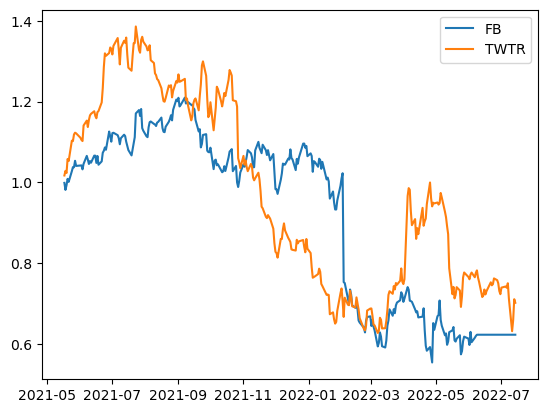

In [92]:
retty = df_closing_prices.pct_change().dropna()

(1+retty).cumprod().plot()

<br>

## Investment Value - Task

In [188]:
d = {'MSFT': [200], 'AAPL': [320]}
port = pd.DataFrame(d)
port.rename(index ={0 : 'share'}, inplace=True)
port3 = port.T

In [122]:
current_MSFT = 200
current_AAPL = 320

ticker1 = ['MSFT', 'AAPL']

In [123]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [124]:
a = pd.Timestamp('2010-11-30', tz = 'America/New_York').isoformat()
b = pd.Timestamp('2016-11-30', tz = 'America/New_York').isoformat()

In [125]:
timeframe = '1Day'

In [134]:
#get current closing prices for tickers
df_pak = alpaca.get_bars(
    ticker1,
    timeframe,
    start = a,
    end = b
).df #WHY DO WE PUT .df?

#display sample data
df_pak

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,118.75,118.81,116.860,117.34,34852374,187129,117.756760,AAPL
2015-12-02 05:00:00+00:00,117.05,118.11,116.080,116.28,33385643,180616,117.151198,AAPL
2015-12-03 05:00:00+00:00,116.55,116.79,114.220,115.20,41560785,245330,115.434888,AAPL
2015-12-04 05:00:00+00:00,115.29,119.25,115.110,119.03,57776977,307788,118.187290,AAPL
2015-12-07 05:00:00+00:00,118.98,119.86,117.810,118.28,32080754,190809,118.509111,AAPL
...,...,...,...,...,...,...,...,...
2016-11-23 05:00:00+00:00,61.01,61.10,60.250,60.40,21936368,107663,60.441067,MSFT
2016-11-25 05:00:00+00:00,60.30,60.53,60.130,60.53,8410638,44435,60.419213,MSFT
2016-11-28 05:00:00+00:00,60.34,61.02,60.210,60.61,20733011,96812,60.640260,MSFT


In [136]:
AAPL=df_pak[df_pak['symbol']=='AAPL'].drop('symbol', axis=1)
              
              
MSFT=df_pak[df_pak['symbol']=='MSFT'].drop('symbol', axis=1)

In [145]:
comb = pd.concat([AAPL, MSFT], axis=1, keys=['AAPL', 'MSFT'])
comb.head(5)

AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2015-12-01 05:00:00+00:00  118.75  118.81  116.86  117.34  34852374   
2015-12-02 05:00:00+00:00  117.05  118.11  116.08  116.28  33385643   
2015-12-03 05:00:00+00:00  116.55  116.79  114.22  115.20  41560785   
2015-12-04 05:00:00+00:00  115.29  119.25  115.11  119.03  57776977   
2015-12-07 05:00:00+00:00  118.98  119.86  117.81  118.28  32080754   

                                                    MSFT                       \
                          trade_count        vwap   open   high    low  close   
timestamp                                                                       
2015-12-01 05:00:00+00:00      187129  117.756760  54.41  55.23  54.30  55.22   
2015-12-02 05:00:00+00:00      180616  117.151198  55.32  55.96  55.06  55.21   
2015-12-03 05:00:00+00:00      245330  115.434888  55.49  55.77  53.93  54.20   
2015-12-04 05:00:00+00:00      307788  118.187290  54.12  56.23  54.10  55.91   
2015-12-07 05:00:00+00:00      190809  118.509111  55.79  55.97  55.29  55.81   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2015-12-01 05:00:00+00:00  39952779      194807  54.877235  
2015-12-02 05:00:00+00:00  47274879      225980  55.484361  
2015-12-03 05:00:00+00:00  38627835      219413  54.475820  
2015-12-04 05:00:00+00:00  43963662      232021  55.540921  
2015-12-07 05:00:00+00:00  30709765      182309  55.623798

In [149]:
close = pd.DataFrame()

close['AAPL'] = comb['AAPL']['close']
close['MSFT'] = comb['MSFT']['close']

close.index = close.index.date #drops time

close

,AAPL,MSFT
2015-12-01,117.34,55.22
2015-12-02,116.28,55.21
2015-12-03,115.20,54.20
2015-12-04,119.03,55.91
2015-12-07,118.28,55.81
...,...,...
2016-11-23,111.23,60.40
2016-11-25,111.79,60.53
2016-11-28,111.57,60.61
2016-11-29,111.46,61.09


In [152]:
AAPL_value = current_AAPL * AAPL.iloc[-1,0]

MFST_value = current_MSFT * MSFT.iloc[-1,0]

In [154]:
print(f'The current value of the 200 MSFT shares is ${MFST_value}')
print(f'The current value of the 320 AAPL shares is ${AAPL_value}')

The current value of the 200 MSFT shares is $12172.0
The current value of the 320 AAPL shares is $35712.0


In [ ]:
close_ret = close.pct_change()

In [162]:
da = {'MSFT': [12172.0], 'AAPL': [35712.0]}
new1 = pd.DataFrame(da)

In [163]:
new1

,MSFT,AAPL
0,12172.0,35712.0


<AxesSubplot:ylabel='share'>

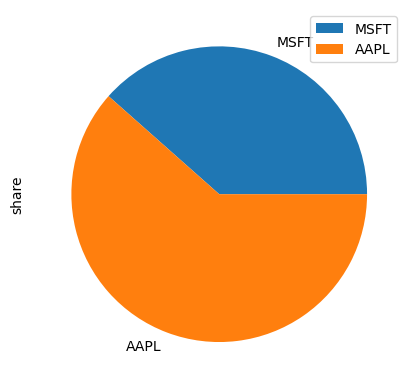

In [190]:
port3.plot(y = 'share',  kind="pie")

<AxesSubplot:>

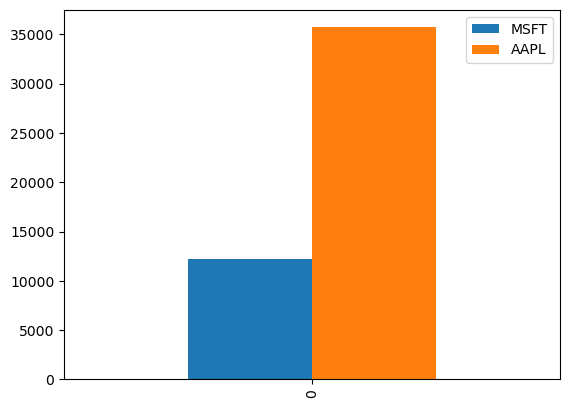

In [174]:
new1.plot(kind="bar")